### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

### Load tensorflow

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
#tf.random.set_seed(42)

### Collect Data

In [0]:
(trainimages, trainlabels), (testimages, testlabels) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
print('train data-set shape{} {}'.format(trainimages.shape,trainlabels.shape))
print('test data-set shape{} {}'.format(testimages.shape,testlabels.shape))

print('Labels for first 10 train data-sets are:',trainlabels[0:10])

train data-set shape(60000, 28, 28) (60000,)
test data-set shape(10000, 28, 28) (10000,)
('Labels for first 10 train data-sets are:', array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainlabels = tf.keras.utils.to_categorical(trainlabels, num_classes=10)
testlabels = tf.keras.utils.to_categorical(testlabels, num_classes=10)

In [9]:
print(testlabels.shape)
print('First 5 examples now are: ', trainlabels[0:5])

(10000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [0]:
# scale the values to a range of 0 to 1 of both data sets
#trainimages = trainimages.astype('float32')/ 255.0
#testimages = testimages.astype('float32') / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

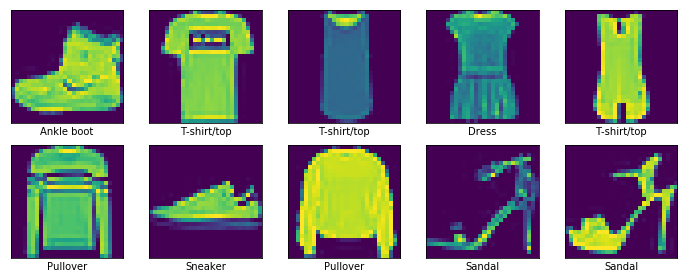

In [11]:
plt.figure(figsize=(12,12))
for i in range(0,10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(trainimages[i])
  label_index = np.argmax(trainlabels[i])
  plt.xlabel(fashion_mnist_labels[label_index])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
### Build the architecture

# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

### Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [13]:
model.fit( trainimages, trainlabels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 77us/sample - loss: 2062.5446 - accuracy: 0.7389
Epoch 2/50
60000/60000 [==============================] - 4s 65us/sample - loss: 1558.3901 - accuracy: 0.7796
Epoch 3/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1563.9165 - accuracy: 0.7860
Epoch 4/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1515.1765 - accuracy: 0.7904
Epoch 5/50
60000/60000 [==============================] - 4s 67us/sample - loss: 1528.0454 - accuracy: 0.7907
Epoch 6/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1452.6558 - accuracy: 0.7960
Epoch 7/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1445.5778 - accuracy: 0.7966
Epoch 8/50
60000/60000 [==============================] - 4s 68us/sample - loss: 1475.8695 - accuracy: 0.7972
Epoch 9/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1446.9320 - accu

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

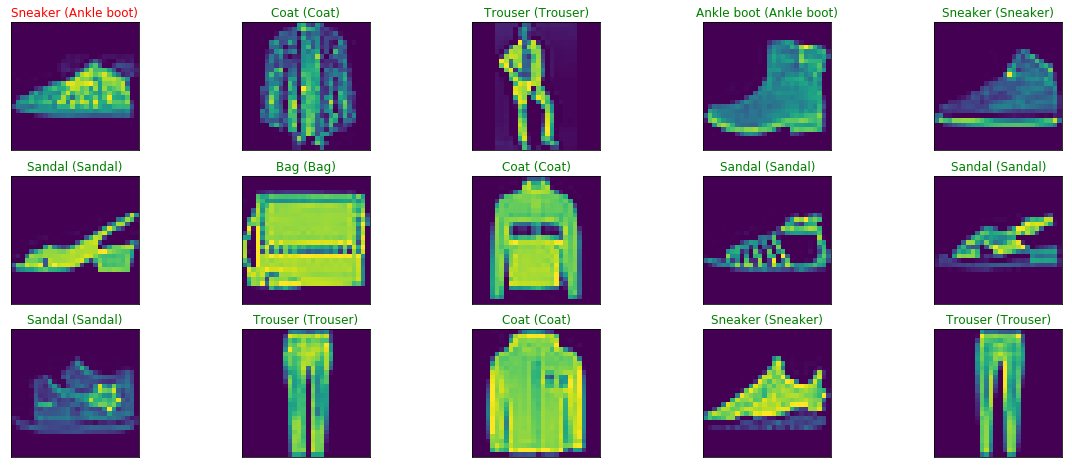

In [14]:
### Evaluate the model
test_loss, test_acc = model.evaluate(testimages, testlabels)
print("Model - test loss:", test_loss * 100)
print("Model - test accuracy:", test_acc * 100)

image_predicted = model.predict(testimages)

figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(testimages.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(testimages[index])
    predict_index = np.argmax(image_predicted[index])
    true_index = np.argmax(testlabels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [15]:
### Build the architecture

# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

### Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [16]:
model.fit( trainimages, trainlabels, epochs=50)

test_loss, test_acc = model.evaluate(testimages, testlabels)
print("Model - test loss:", test_loss * 100)
print("Model - test accuracy:", test_acc * 100)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5983 - accuracy: 0.7950
Epoch 2/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4918 - accuracy: 0.8308
Epoch 3/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4683 - accuracy: 0.8368
Epoch 4/50
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4567 - accuracy: 0.8412
Epoch 5/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4516 - accuracy: 0.8431
Epoch 6/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4412 - accuracy: 0.8474
Epoch 7/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4404 - accuracy: 0.8477
Epoch 8/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4376 - accuracy: 0.8474
Epoch 9/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4313 - accuracy: 0.8506
Epoch 10/50
60

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [17]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

### Compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model
model.fit( trainimages, trainlabels, epochs=50)

### Evaluate the model
test_loss, test_acc = model.evaluate(testimages, testlabels)
print("Model - test loss:", test_loss * 100)
print("Model - test accuracy:", test_acc * 100)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3945 - accuracy: 0.8605
Epoch 2/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3947 - accuracy: 0.8618
Epoch 3/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3921 - accuracy: 0.8618
Epoch 4/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3916 - accuracy: 0.8619
Epoch 5/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3903 - accuracy: 0.8632
Epoch 6/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3947 - accuracy: 0.8606
Epoch 7/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3909 - accuracy: 0.8640
Epoch 8/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3917 - accuracy: 0.8613
Epoch 9/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3916 - accuracy: 0.8611
Epoch 10/50
60

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [18]:
### Build the architecture

# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer 
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

### Compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.03)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 90,010
Trainable params: 89,810
Non-trainable params: 200
_________________________________________________________________


In [19]:
model.fit( trainimages, trainlabels, epochs=50)

test_loss, test_acc = model.evaluate(testimages, testlabels)
print("Model - test loss:", test_loss * 100)
print("Model - test accuracy:", test_acc * 100)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/sample - loss: 1.3185 - accuracy: 0.4959
Epoch 2/50
60000/60000 [==============================] - 5s 80us/sample - loss: 1.1605 - accuracy: 0.5402
Epoch 3/50
60000/60000 [==============================] - 5s 80us/sample - loss: 1.0663 - accuracy: 0.5886
Epoch 4/50
60000/60000 [==============================] - 5s 82us/sample - loss: 1.0064 - accuracy: 0.6058
Epoch 5/50
60000/60000 [==============================] - 5s 79us/sample - loss: 1.0569 - accuracy: 0.5830
Epoch 6/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.9323 - accuracy: 0.6336
Epoch 7/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.8754 - accuracy: 0.6615
Epoch 8/50
60000/60000 [==============================] - 5s 80us/sample - loss: 0.9360 - accuracy: 0.6362
Epoch 9/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.9603 - accuracy: 0.6366
Epoch 10/50
60

## Review model

In [0]:
### Build NN model with hidden layers for differenct acivation function and output layer with softmax as an activation function

def Build_NN_3layer(hidden_layer_activation_func):
  ### Build the architecture
  print('Build NN model with 3 dense layer and for hidden layer activation func is {} '.format(hidden_layer_activation_func))

  # Initialize Sequential model
  model = tf.keras.models.Sequential()

  # Reshape data from 2D to 1D -> 28x28 to 784
  model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

  # Add Dense Layer 
  model.add(tf.keras.layers.Dense(100, activation=hidden_layer_activation_func))
  model.add(tf.keras.layers.Dense(100, activation=hidden_layer_activation_func))

  # Normalize the data
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate=0.001)

  ### Compile the model
  model.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### Train the model
  model_history = model.fit( trainimages, trainlabels, epochs=50, validation_split=0.2)

  ### Evaluate the model
  test_loss, test_acc = model.evaluate(testimages, testlabels)
  print("Model - test loss:", test_loss * 100)
  print("Model - test accuracy:", test_acc * 100)

  return model_history

In [22]:
sigmoid_model_history = Build_NN_3layer('sigmoid')

Build NN model with 3 dense layer and for hidden layer activation func is sigmoid 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 90,010
Trainable params: 89,810
Non-trainable params: 200
_________________________________________________________________
Train on 48000 samples, validat

In [23]:
tan_model_history = Build_NN_3layer('tanh')

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 104us/sample - loss: 1.7931 - accuracy: 0.2822 - val_loss: 2.2022 - val_accuracy: 0.2093
Epoch 2/50
48000/48000 [==============================] - 4s 93us/sample - loss: 1.7580 - accuracy: 0.2749 - val_loss: 1.8186 - val_accuracy: 0.2464
Epoch 3/50
48000/48000 [==============================] - 5s 96us/sample - loss: 1.8439 - accuracy: 0.2312 - val_loss: 1.8180 - val_accuracy: 0.2412
Epoch 4/50
48000/48000 [==============================] - 5s 96us/sample - loss: 1.7560 - accuracy: 0.2459 - val_loss: 2.1353 - val_accuracy: 0.2803
Epoch 5/50
48000/48000 [==============================] - 5s 96us/sample - loss: 1.6326 - accuracy: 0.2931 - val_loss: 1.4526 - val_accuracy: 0.3912
Epoch 6/50
48000/48000 [==============================] - 5s 95us/sample - loss: 1.6262 - accuracy: 0.3167 - val_loss: 1.6444 - val_accuracy: 0.3279
Epoch 7/50
48000/48000 [==============================]

In [24]:
relu_model_history = Build_NN_3layer('relu')

Build NN model with 3 dense layer and for hidden layer activation func is relu 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 90,010
Trainable params: 89,810
Non-trainable params: 200
_________________________________________________________________
Train on 48000 samples, validate o

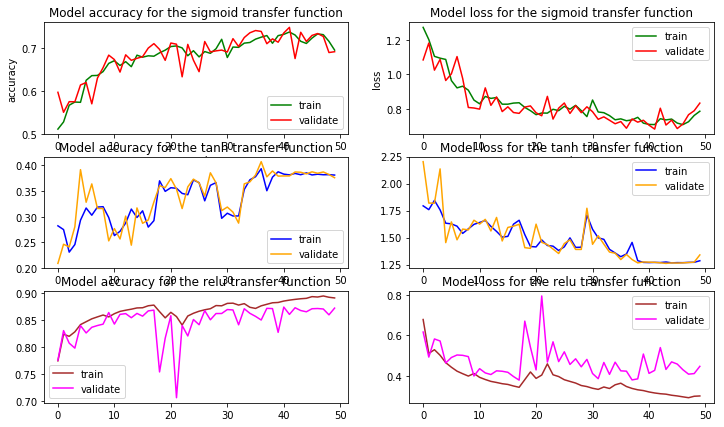

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(12,7))

ax[0,0].plot(sigmoid_model_history.history['accuracy'], 'green',label='train')
ax[0,0].plot(sigmoid_model_history.history['val_accuracy'], 'red',label='validate')
ax[0,0].legend()
ax[0,0].set_title('Model accuracy for the sigmoid transfer function')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')

ax[1,0].plot(tan_model_history.history['accuracy'], 'blue',label='train')
ax[1,0].plot(tan_model_history.history['val_accuracy'], 'orange',label='validate')
ax[1,0].legend()
ax[1,0].set_title('Model accuracy for the tanh transfer function')

ax[2,0].plot(relu_model_history.history['accuracy'], 'brown',label='train')
ax[2,0].plot(relu_model_history.history['val_accuracy'], 'magenta',label='validate')
ax[2,0].legend()
ax[2,0].set_title('Model accuracy for the relu transfer function')

ax[0,1].plot(sigmoid_model_history.history['loss'], 'green',label='train')
ax[0,1].plot(sigmoid_model_history.history['val_loss'], 'red',label='validate')
ax[0,1].legend()
ax[0,1].set_title('Model loss for the sigmoid transfer function')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')

ax[1,1].plot(tan_model_history.history['loss'], 'blue',label='train')
ax[1,1].plot(tan_model_history.history['val_loss'], 'orange',label='validate')
ax[1,1].legend()
ax[1,1].set_title('Model loss for the tanh transfer function')

ax[2,1].plot(relu_model_history.history['loss'], 'brown',label='train')
ax[2,1].plot(relu_model_history.history['val_loss'], 'magenta',label='validate')
ax[2,1].legend()
ax[2,1].set_title('Model loss for the relu transfer function')

plt.show()


## Inferences:

1. With Batch normalisation the loss and accuracy improves and along with better learning rater it is improved further.

2. From the above it can be infered that model(learning rate=0.001 and batch normalisation applied) with hidden layer that has relu as a activation function has better accuracy and loss while compared to other activation models.

Model without normalisation:
  ('test loss:', 115863.54026367186)
  ('test accuracy:', 79.97999787330627)

With Batch normlisation applied between hidden and outpt layer:
  ('test loss:', 48.56388756036758)
  ('test accuracy:', 83.95000100135803)

Along with Batch normalisation and better learning rate:
  ('test loss:', 46.3559725856781)
  ('test accuracy:', 84.21000242233276)

Model's hidden layer activation function-sigmoid:
  ('test loss:', 85.37431504249572)
  ('test accuracy:', 68.97000074386597)

Model's hidden layer activation function-tanh:
 ('test loss:', 134.0783432674408)
 ('test accuracy:', 37.369999289512634)

Model's hidden layer activation function-relu:
  ('test loss:', 41.257807515859604)
  ('test accuracy:', 86.23999953269958)